
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more.
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

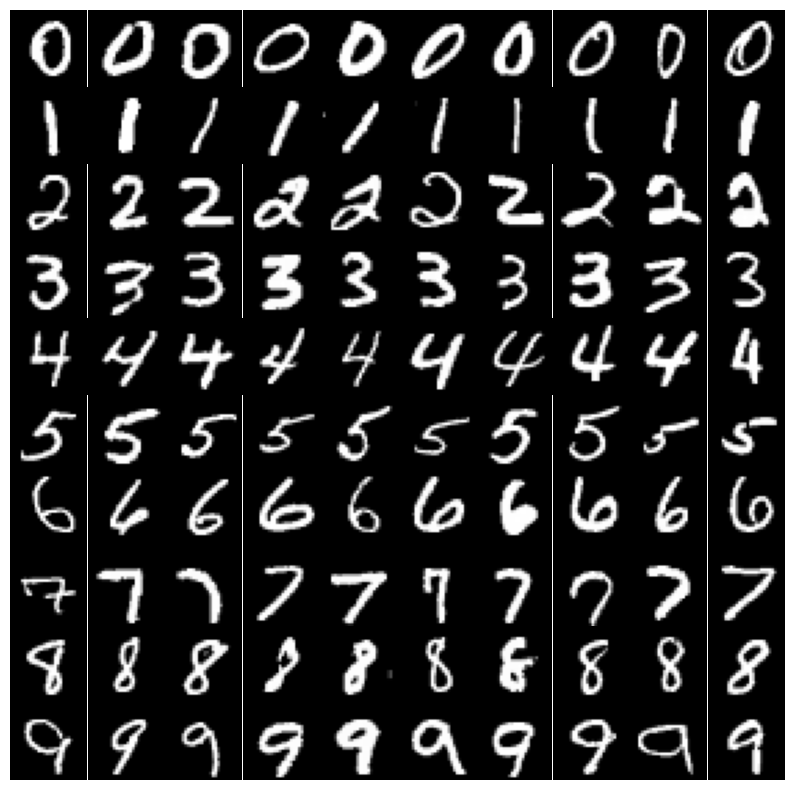

In [5]:
def Q1(num_examples=10):
  ### STUDENT START ###
  #creating the subplots for display grid
  fig, ax = plt.subplots(10,num_examples, figsize=(num_examples, 10))

  for number in range(10):
    #finding and storing examples from the train_labels that match 0-9
    number_indices = np.where(train_labels == str(number))[0][:num_examples]

    for i, exp_idx in enumerate(number_indices):
      # print examples
      image_data = train_data.iloc[exp_idx].values.reshape(28,28)

      ax[number, i].imshow(image_data, cmap='gray')
      ax[number, i].axis('off')

  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()


  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model.
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label.
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [6]:
def Q2(k_values):
### STUDENT START ###
  myReport =[] #
  # 1. For-loop through the 5 values of k given to you by the question
  for i in range(len(k_values)):
  # 2. In each for loop, build a new KNeighborsClassifier model and fit to the mini_train_data, mini_train_labels
    knn = KNeighborsClassifier(n_neighbors=k_values[i])
    knn.fit(mini_train_data, mini_train_labels)
    mini_train_pred = knn.predict(dev_data)
  # 3. Print accuracy of the model in the loop
    if(i == 0):
      # printing full report for only 1-nn
      print("Classification Report for 1nn: ")
      print(classification_report(dev_labels, mini_train_pred))

    classReport = classification_report(dev_labels, mini_train_pred, output_dict=True)
    print("when k is %d , accuracy : "%k_values[i], classReport["accuracy"])
    myReport.append(classReport["accuracy"])



### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

Classification Report for 1nn: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

when k is 1 , accuracy :  0.884
when k is 3 , accuracy :  0.876
when k is 5 , accuracy :  0.882
when k is 7 , accuracy :  0.877
when k is 9 , accuracy :  0.875


Answer to part 4:
I would say that the hardest digit for the model to classify would be 8 since it has the second lowest percision score, the lowest recall score, and the lowest f1. i think that 9 is a close second, but when looking at the over all report for 1nn, 8 does the worst.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to:
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

when train size is 100 , time passed  0.01736307144165039
eval time: 0
accuracies: 0.702 

when train size is 200 , time passed  0.009232759475708008
eval time: 0
accuracies: 0.791 

when train size is 400 , time passed  0.009383678436279297
eval time: 0
accuracies: 0.811 

when train size is 800 , time passed  0.011092424392700195
eval time: 0
accuracies: 0.866 

when train size is 1600 , time passed  0.014029979705810547
eval time: 0
accuracies: 0.905 

when train size is 3200 , time passed  0.019441843032836914
eval time: 0
accuracies: 0.927 

when train size is 6400 , time passed  0.0313870906829834
eval time: 0
accuracies: 0.939 

when train size is 12800 , time passed  0.05546760559082031
eval time: 0
accuracies: 0.952 

when train size is 25600 , time passed  0.13069677352905273
eval time: 1
accuracies: 0.963 



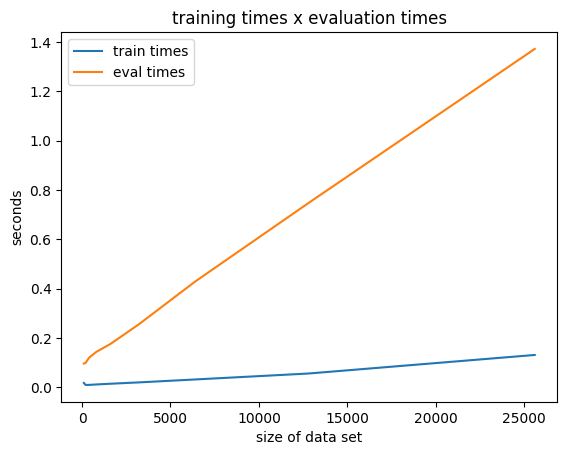

In [7]:
def Q3(train_sizes, accuracies, train_times, eval_times):

### STUDENT START ###
  for i in range(len(train_sizes)):
    # creating 1nn model and training it on different data sizes stored in train_sizes
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_data[:train_sizes[i]], train_labels[:train_sizes[i]])
    end = time.time()
    # calculating time for training
    train_times.append(abs(end - start))
    # using the trained model to predict results using dev set
    start = time.time()
    train_pred = knn.predict(dev_data)
    print("when train size is %d , time passed "%train_sizes[i], train_times[i])
    # passing output_dict to pull accuracy from report and storing in accuracies list
    myReport = classification_report(dev_labels, train_pred, output_dict=True)
    accuracies.append(myReport["accuracy"])
    end = time.time()
    # calculating time to evaluate
    eval_times.append(abs(end - start))

    print("eval time: %d"%eval_times[i])
    print("accuracies: %s \n"%myReport["accuracy"])

  #start plt here for times of training and evaluation
  plt.figure()
  plt.plot(train_sizes, train_times)
  plt.plot(train_sizes, eval_times)
  plt.title("training times x evaluation times")
  plt.xlabel('size of data set')
  plt.ylabel('seconds')
  plt.legend(['train times', 'eval times'], loc='upper left')
  plt.show()

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)





answer part 4:
i observed as the training sizes increase for the 1-nn model, it becomes more accurate. this is what i expected because the more points available, the more likely there is a point that will match the input data. when there is more data points available in the proximity of the data point that the prediction is being preformed on, the better the chances are of finding an accurate prediction.

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size.
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size.
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues.
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

accuracy predictions of og LR:  [1.23617317 1.63742805 7.52249967]


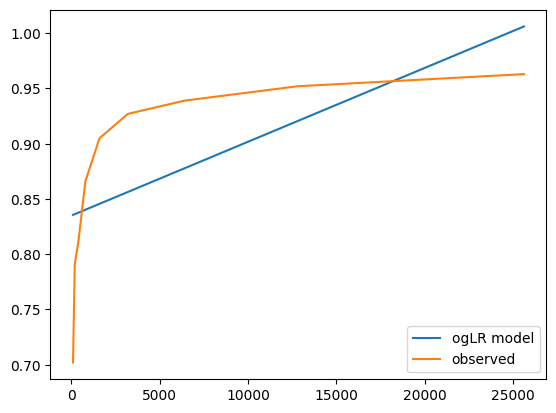

accuracy predictions of log LR:  [1.03358792 1.06432125 1.15833125]
accuracy predictions of odd LR : [0.98329271 0.99111439 0.99887043]
accuracy predictions of log final:  [0.96307017 0.96659196 0.97413657]


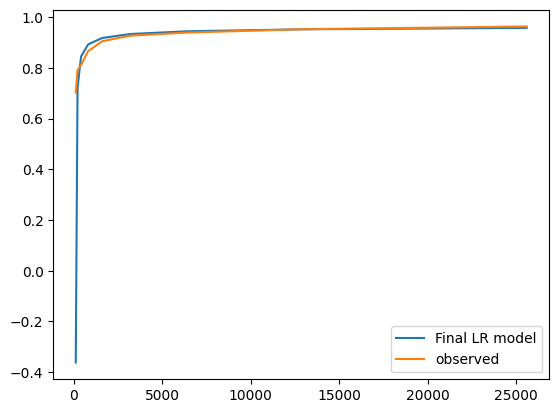

In [8]:
def Q4(train_sizes, acc, sizes_pred):
  ### STUDENT START ###

  #logit and logistic functions to go between odds and probabilities
  probs_to_odds = lambda x : x / (1.0 - x)
  odds_to_probs = lambda x : x / (1.0 + x)

  # converting sizes into numpy array
  xsizes_arr = np.array(train_sizes)[:, np.newaxis]
  PredictionSize = np.array(sizes_pred)[:, np.newaxis]
  # converting exponential to linear relationship, helps with training the model
  xsizes_log = np.array(np.log(train_sizes))[:,np.newaxis]
  yacc_p2o = np.array(list(map(probs_to_odds, acc)))
  log_pred_sizes = np.array(np.log(sizes_pred))[:, np.newaxis]

  # creating LR model object and train it on sizes and accuracies from last problem
  ogLR = LinearRegression()
  ogLR.fit(xsizes_arr, acc)
  ogLR.score(xsizes_arr, acc)
  print("accuracy predictions of og LR: ",ogLR.predict(PredictionSize))

  #1) graph for no transformation (ogLR)
  plt.figure()
  plt.plot(xsizes_arr, ogLR.predict(xsizes_arr))
  plt.plot(train_sizes, accuracies)
  plt.title = ('no data transformation')
  plt.xlabel = ('size')
  plt.ylabel = ('accuracies')
  plt.legend(['ogLR model', 'observed'], loc='lower right')
  plt.show()

  # creating new LR model with log converted input
  logLR = LinearRegression()
  logLR.fit(xsizes_log, acc)
  logLR.score(xsizes_log, acc)
  print("accuracy predictions of log LR: ",logLR.predict(log_pred_sizes) )

  # creating new LR model with odds converted output
  oddLR = LinearRegression()
  oddLR.fit(xsizes_arr, yacc_p2o)
  oddLR.score(xsizes_arr, yacc_p2o)
  print("accuracy predictions of odd LR :", odds_to_probs(oddLR.predict(PredictionSize)))

  # creating final LR model with log trans input AND odds trans output
  finalLR = LinearRegression()
  finalLR.fit(xsizes_log, yacc_p2o)
  finalLR.score(xsizes_log, yacc_p2o)
  print("accuracy predictions of log final: ",odds_to_probs(finalLR.predict(log_pred_sizes)) )

  #2) graph for log trans input AND odds trans output (finalLR)
  plt.figure()
  plt.plot(xsizes_arr, odds_to_probs(finalLR.predict(xsizes_log)))
  plt.plot(train_sizes, accuracies)
  plt.title = ('no data transformation')
  plt.xlabel = ('size')
  plt.ylabel = ('accuracies')
  plt.legend(['Final LR model', 'observed'], loc='lower right')
  plt.show()

  ### STUDENT END ###
sizes_pred = [60000, 120000, 1000000]
Q4(train_sizes, accuracies, sizes_pred)



Answer to part 5:  
the problem with my first model is how the data's relationship is exponential but is presented to the LR model without any indication it is NOT a linear relationship. the model incorrectly assumes the data has a linear relationship to itself thus causes the first (ogLR) linear regression model to fail at predecting the correct results.
HOWEVER! we can fix this by outfitting the data to have a linear relationship to itself. in the fourth or last model (finalLR), i have altered the input data by performing np.log() on it to illistrate the linear relationship to the model; i have also done the odds_to_probs() function to the output to scale the output approperatly. the by altering the data to be easier to consume for the model, i have achieved keeping the model simple and also have results that make sense compared to the observed data set.


### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix.
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]
0 's score: 5
1 's score: 2
2 's score: 22
3 's score: 13
4 's score: 14
5 's score: 11
6 's score: 8
7 's score: 6
8 's score: 22
9 's score: 13
the winner is: 2 with a score of 22
which makes 2 the most misclassified digit!


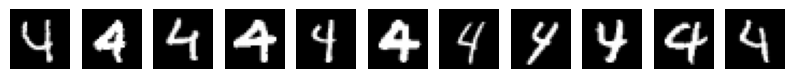

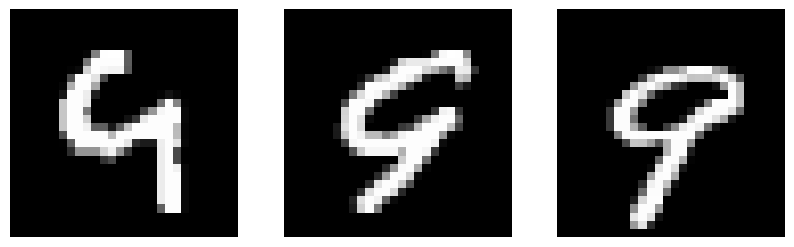

In [25]:
def Q5():
  ### STUDENT START ###
  # init my 1nn model, train it, and have it predict
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(mini_train_data, mini_train_labels)
  knnPredict = knn.predict(dev_data)
  # printing confusion matrix
  cMat = confusion_matrix(dev_labels, knnPredict)
  print(cMat)
  # shows which digit was misclassified the most across the board
  sums = []
  for i in range(10):
    count = 0
    for j in range(10):
      count += cMat[i][j]
    count -= cMat[i][i]
    sums.append(count)
    print("%s 's score: %s"%(i, count))
  print("the winner is: %s with a score of %s"%(sums.index(max(sums)), max(sums)))
  print("which makes %s the most misclassified digit!"%sums.index(max(sums)))

  # the two digits most confused with eachother was 4 and 9.
  # plot examples of the confused digits.
  #show mis-classified 4's
  fig, ax = plt.subplots(1,11, figsize=(10,10))
  misPre_4 = (dev_labels == "4") & (knnPredict == "9")
  c = 0
  for num in [i for i, k in enumerate(misPre_4) if k]:
    image_data = dev_data.iloc[num].values.reshape(28,28)
    ax[c].imshow(image_data, cmap='gray')
    ax[c].axis('off')
    c+=1
  plt.show()

  #show mis-classified 9's
  fig, ax = plt.subplots(1,3, figsize=(10,10))
  misPre_9 = (dev_labels == "9") & (knnPredict == "4")
  c = 0
  for num in [i for i, k in enumerate(misPre_9) if k]:
    image_data = dev_data.iloc[num].values.reshape(28,28)
    ax[c].imshow(image_data, cmap='gray')
    ax[c].axis('off')
    c+=1
  plt.show()



  ### STUDENT END ###

Q5()


Answer to part 3:
i think the most confused digits are 9 and 4 it mistakes 9 for 4 often. i think this because when i look at the confusion matrix, 9x4 is the highet value in the outter regions of the matrix.
the most missclassifed number is 2 with the highest total of missclassifications.
(p.s. im sorry i couldn't get the images to line up horizontally)